import sys
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#filename = sys.argv[1]
eventfile=fits.open('filename')
events=eventfile[1].data
shortdat=events[(events['TIME']>660920900) & (events['TIME']<660921200)]
cleanevts = shortdat[(shortdat['EVENT_FLAGS']==0) & (shortdat['ENERGY']>15)]
filterdat = shortdat[(shortdat['EVENT_FLAGS']==0) & (shortdat['ENERGY']>15)]

time = []

df = pd.DataFrame(filterdat, columns = ['TIME','DET_ID','EVENT_FLAGS','PHA','MASK_WEIGHT','DETX','DETY','PI','ENERGY'])
df['TIME'] = df['TIME'].apply(lambda x: round(x))
time.extend(df['TIME'].tolist())

In [94]:
import sys
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#filename = sys.argv[1]
eventfile=fits.open('sw01088940000bevshsp_uf.evt.gz')
events=eventfile[1].data
shortdat=events[(events['TIME']>660920900) & (events['TIME']<660921200)]
cleanevts = shortdat[(shortdat['EVENT_FLAGS']==0) & (shortdat['ENERGY']>15)]
filterdat = shortdat[(shortdat['EVENT_FLAGS']==0) & (shortdat['ENERGY']>15)]

time = []

df = pd.DataFrame(filterdat, columns = ['TIME','DET_ID','EVENT_FLAGS','PHA','MASK_WEIGHT','DETX','DETY','PI','ENERGY'])
df['TIME'] = df['TIME'].apply(lambda x: round(x))
time.extend(df['TIME'].tolist())

_=plt.hist(shortdat['TIME'], bins=300)
plt.xlabel('Time (s)')

In [95]:
time = []

df = pd.DataFrame(filterdat, columns = ['TIME','DET_ID','EVENT_FLAGS','PHA','MASK_WEIGHT','DETX','DETY','PI','ENERGY'])
df['TIME'] = df['TIME'].apply(lambda x: round(x))
time.extend(df['TIME'].tolist())

In [96]:
photons = np.empty((0,1), int)
temp = 0

timearray = np.array(list(range(time[0], time[-1])))
    

for i in timearray:
    for j in range(len(time)):
        if time[j] == i:
            temp = temp + 1
    photons = np.append(photons, np.array([[temp]]))
    temp = 0

photons

array([  2322,   4681,   4663,   4760,   4738,   4741,   4716,   4523,
         4672,   4636,   4796,   4641,   4630,   4707,   4680,   4751,
         4653,   4640,   4587,   4672,   4620,   4603,   4671,   4715,
         4727,   4553,   4619,   4633,   4702,   4685,   4714,   4590,
         4722,   4575,   4700,   4621,   4749,   4828,   4637,   4657,
         4677,   4693,   4598,   4671,   4734,   4813,   4595,   4709,
         4723,   4535,   4609,   4628,   4581,   4611,   4577,   4589,
         4472,   4782,   4612,   4806,   4698,   4517,   4664,   4751,
         4686,   4642,   4537,   4591,   4630,   4711,   4643,   4623,
         4531,   4619,   4666,   4713,   4650,   4602,   4830,   4675,
         4734,   4588,   4633,   4707,   4763,   4635,   4653,   4850,
         4727,   4554,   4656,   4760,   4558,   4733,   4629,   4819,
         4672,   4606,   4731,   4687,   4776,   4639,   4617,   4657,
         4679,   4700,   4652,   4705,   4841,   4546,   4588,   4532,
      

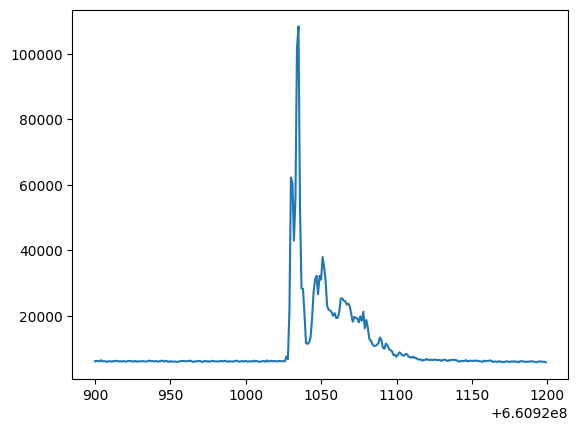

In [5]:
bins,ns=np.histogram(shortdat['TIME'],bins=300)
plt.plot(ns[:-1],bins)

Text(0, 0.5, '# of photons')

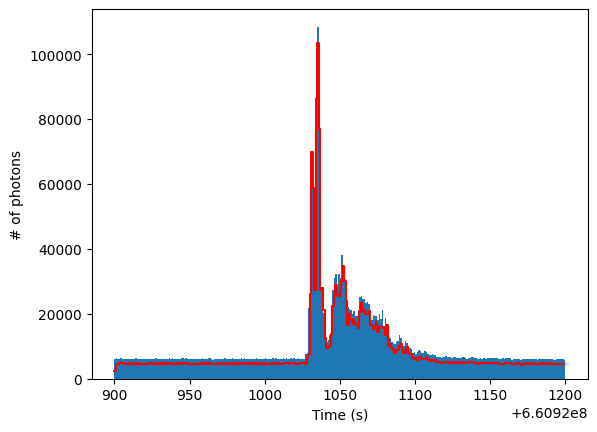

In [6]:
_=plt.hist(shortdat['TIME'], bins=300)
plt.plot(timearray, photons, 'r-', drawstyle='steps-post')
plt.xlabel('Time (s)')
plt.ylabel('# of photons')

--------------------------------------------------------------------------------------------------------------------

## METHOD 2: Standard deviation every 5 seconds

In [5]:
length = 5
edgesx = np.empty((0,1))
means = np.empty((0,1))
stds = np.empty((0,1))
topy = np.empty((0,1))
bottomy = np.empty((0,1))
for i in range(int((time[-1] - time[0])/length)):
    edgesx = np.append(edgesx, np.array([[time[0] + length*i]]))
    means = np.append(means, np.array([[np.mean(photons[length*i:length*(i+1)])]]))
    std = np.std(photons[length*i:length*(i+1)])
    stds = np.append(stds, np.array([[std]]))
    topy = np.append(topy, np.array([[np.mean(photons[length*i:length*(i+1)]) + 3 * std]]))
    bottomy = np.append(bottomy, np.array([[np.mean(photons[length*i:length*(i+1)]) - 3 * std]]))
    
edgesx = np.append(edgesx, np.array([[edgesx[-1] + length]]))
means = np.append(means, np.array([[means[-1]]]))
stds = np.append(stds, np.array([[stds[-1]]]))
topy = np.append(topy, np.array([[topy[-1]]]))
bottomy = np.append(bottomy, np.array([[bottomy[-1]]]))
    
print(edgesx)
print(means)
print(stds)
print(topy)
print(bottomy)

[6.60920900e+08 6.60920905e+08 6.60920910e+08 6.60920915e+08
 6.60920920e+08 6.60920925e+08 6.60920930e+08 6.60920935e+08
 6.60920940e+08 6.60920945e+08 6.60920950e+08 6.60920955e+08
 6.60920960e+08 6.60920965e+08 6.60920970e+08 6.60920975e+08
 6.60920980e+08 6.60920985e+08 6.60920990e+08 6.60920995e+08
 6.60921000e+08 6.60921005e+08 6.60921010e+08 6.60921015e+08
 6.60921020e+08 6.60921025e+08 6.60921030e+08 6.60921035e+08
 6.60921040e+08 6.60921045e+08 6.60921050e+08 6.60921055e+08
 6.60921060e+08 6.60921065e+08 6.60921070e+08 6.60921075e+08
 6.60921080e+08 6.60921085e+08 6.60921090e+08 6.60921095e+08
 6.60921100e+08 6.60921105e+08 6.60921110e+08 6.60921115e+08
 6.60921120e+08 6.60921125e+08 6.60921130e+08 6.60921135e+08
 6.60921140e+08 6.60921145e+08 6.60921150e+08 6.60921155e+08
 6.60921160e+08 6.60921165e+08 6.60921170e+08 6.60921175e+08
 6.60921180e+08 6.60921185e+08 6.60921190e+08 6.60921195e+08
 6.60921200e+08]
[ 4232.8  4657.6  4690.8  4660.6  4667.2  4638.4  4660.2  4698.4  46

--------------------------------------------------------------------------------------------------------------------

## METHOD 2.3: Assuming the background is the first 50 seconds

(0.0, 2000.0)

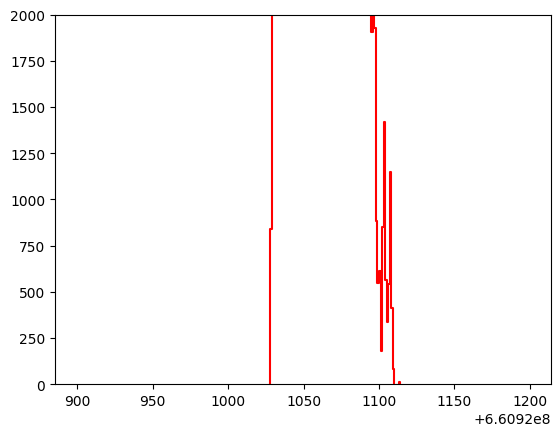

In [36]:
plt.plot(timearray, photons-((np.mean(photons[0:50])) + 3*np.std(photons[0:50])), 'r-', drawstyle='steps-post')
plt.ylim(0,2000)

In [37]:
bkgsubphotons = photons-(np.mean(photons[0:50]) + 3*np.std(photons[0:50]))

In [62]:
assumestart = timearray[np.where(bkgsubphotons>0)[0][0]]
assumeend = timearray[np.where(bkgsubphotons>0)[0][-1]]

print(assumestart)
print(assumeend)

660921028
660921113


In [76]:
assumemethod = filterdat[(filterdat['TIME']>assumestart) & (filterdat['TIME']<assumeend)]

Text(0, 0.5, '# of photons')

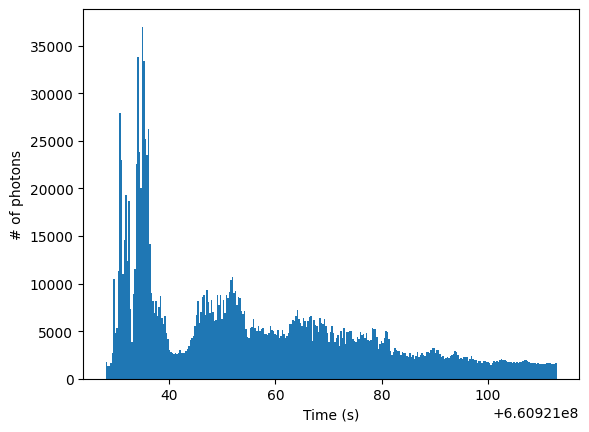

In [77]:
_=plt.hist(assumemethod['TIME'], bins=300)
plt.xlabel('Time (s)')
plt.ylabel('# of photons')

bkgsubphotons = photons-(np.mean(photons[0:50]) + 3*np.std(photons[0:50]))

assumestart = timearray[np.where(bkgsubphotons>0)[0][0]]
assumeend = timearray[np.where(bkgsubphotons>0)[0][-1]]

assumemethod = filterdat[(filterdat['TIME']>assumestart) & (filterdat['TIME']<assumeend)]

_=plt.hist(assumemethod['TIME'], bins=300)
plt.xlabel('Time (s)')
plt.ylabel('# of photons')

--------------------------------------------------------------------------------------------------------------------

## METHOD 2.1: Comparing mean to previous std

In [93]:
start = []
end = 0
for i in range(len(edgesx) - 1):
    if means[i+1] > topy[i]:
        start.append(timearray[5*i])

for i in range(len(edgesx) - 1):
    if means[i+1] < bottomy[i]:
        end = timearray[5*i]

print(start)
print(end)

[660921020, 660921025, 660921040]
660921150


In [74]:
comparemethod = filterdat[(filterdat['TIME']>start[-1]) & (filterdat['TIME']<end)]

Text(0, 0.5, '# of photons')

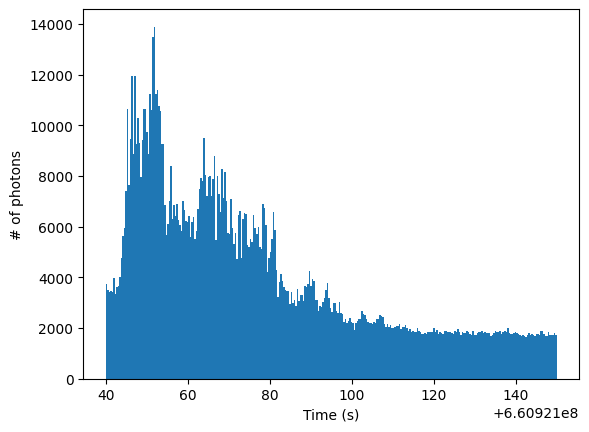

In [75]:
_=plt.hist(comparemethod['TIME'], bins=300)
plt.xlabel('Time (s)')
plt.ylabel('# of photons')

start = []
end = 0
for i in range(len(edgesx) - 1):
    if means[i+1] > topy[i]:
        start.append(timearray[5*i])

for i in range(len(edgesx) - 1):
    if means[i+1] < bottomy[i]:
        end = timearray[5*i]

comparemethod = filterdat[(filterdat['TIME']>start[-1]) & (filterdat['TIME']<end)]

_=plt.hist(comparemethod['TIME'], bins=300)
plt.xlabel('Time (s)')
plt.ylabel('# of photons')

--------------------------------------------------------------------------------------------------------------------

## METHOD 2.2: Sliding frame (BEST)

In [79]:
intervals = pd.DataFrame(columns = ['START', 'END', 'COUNTMEAN'])
maxstart = []
maxend = []
maxmean = []
for i in range(len(timearray)):
    tempstartlist = []
    tempendlist = []
    tempmeanlist = []
    
    for j in range(0, time[-1] - time[0]):
        if j+i+1 <= 300:
            tempstartlist.append(j)
            tempendlist.append(j+i+1)
            tempmeanlist.append(np.mean(photons[j:j+i+1]))
    
    for i in range(len(tempstartlist)):
        if tempmeanlist[i] == np.max(tempmeanlist):
            maxstart.append(tempstartlist[i])
            maxend.append(tempendlist[i])
            maxmean.append(tempmeanlist[i])
    
intervals['START'] = maxstart
intervals['END'] = maxend
intervals['COUNTMEAN'] = maxmean

intervals

,START,END,COUNTMEAN
0,135,136,103347.000000
1,134,136,94709.500000
2,134,137,88818.333333
3,134,138,73455.000000
4,132,137,70482.000000
...,...,...,...
295,1,297,8699.212838
296,1,298,8685.542088
297,1,299,8671.540268
298,1,300,8657.732441


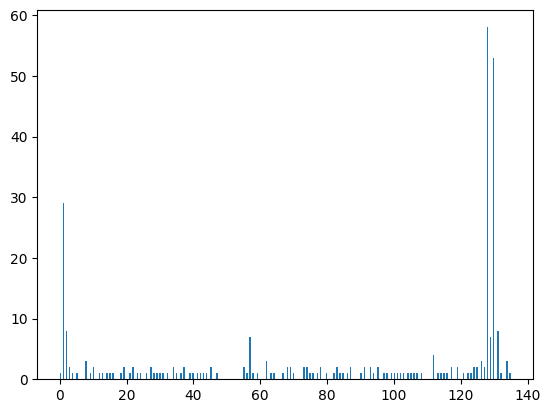

In [80]:
_=plt.hist(intervals['START'], bins=300)

In [86]:
freqstart = np.argmax(np.bincount(intervals['START']))
freqend = 0

for i in range(len(maxstart)):
    if intervals['START'][i] == freqstart:
        if intervals['END'][i] > freqend:
            freqend = intervals['END'][i]

print(freqstart)
print(freqend)

128
264


In [87]:
slidemethod = filterdat[(filterdat['TIME']>timearray[freqstart]) & (filterdat['TIME']<timearray[freqend])]

Text(0, 0.5, '# of photons')

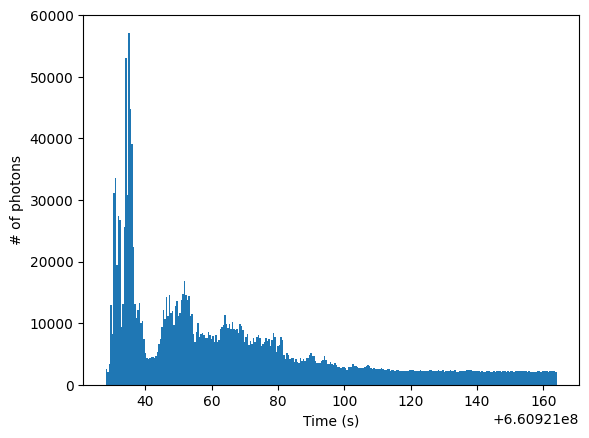

In [88]:
_=plt.hist(slidemethod['TIME'], bins=300)
plt.xlabel('Time (s)')
plt.ylabel('# of photons')

intervals = pd.DataFrame(columns = ['START', 'END', 'COUNTMEAN'])
maxstart = []
maxend = []
maxmean = []
for i in range(len(timearray)):
    tempstartlist = []
    tempendlist = []
    tempmeanlist = []
    
    for j in range(0, time[-1] - time[0]):
        if j+i+1 <= 300:
            tempstartlist.append(j)
            tempendlist.append(j+i+1)
            tempmeanlist.append(np.mean(photons[j:j+i+1]))
    
    for i in range(len(tempstartlist)):
        if tempmeanlist[i] == np.max(tempmeanlist):
            maxstart.append(tempstartlist[i])
            maxend.append(tempendlist[i])
            maxmean.append(tempmeanlist[i])
    
intervals['START'] = maxstart
intervals['END'] = maxend
intervals['COUNTMEAN'] = maxmean

freqstart = np.argmax(np.bincount(intervals['START']))
freqend = 0

for i in range(len(maxstart)):
    if intervalranges['START'][i] == freqstart:
        if intervals['ErangeND'][i] > freqend:
            freqend = intervals['END'][i]
            
slidemethod = filterdat[(filterdat['TIME']>timearray[freqstart]) & (filterdat['TIME']<timearray[freqend])]

_=plt.hist(slidemethod['TIME'], bins=300)
plt.xlabel('Time (s)')
plt.ylabel('# of photons')

--------------------------------------------------------------------------------------------------------------------

## METHOD 1.0: Finding the slope

In [89]:
sum = 0
count = 0
for i in range(len(photons) - 1):
    if photons[i+1] - photons[i] < 2000:
        sum = sum + photons[i]
        count = count + 1

avg = sum/count
avg

7893.528169014085

In [90]:
temparray = np.empty((0,2), int)

for i in range(len(photons)):
    if photons[i] > avg:
        temparray = np.append(temparray, np.array([timearray[i]]))
        
print(temparray[0])
print(temparray[-1])

660921030
660921094


In [91]:
slopemethod = filterdat[(filterdat['TIME']>temparray[0]) & (filterdat['TIME']<temparray[-1])]

Text(0, 0.5, '# of photons')

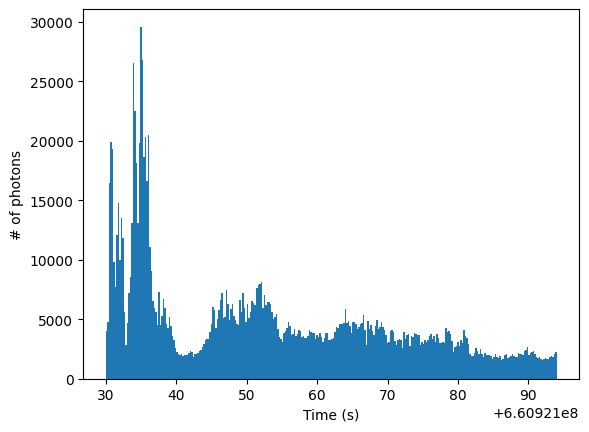

In [92]:
_=plt.hist(slopemethod['TIME'], bins=300)
plt.xlabel('Time (s)')
plt.ylabel('# of photons')

sum = 0
count = 0
for i in range(len(photons) - 1):
    if photons[i+1] - photons[i] < 2000:
        sum = sum + photons[i]
        count = count + 1

avg = sum/count
temparray = np.empty((0,2), int)

for i in range(len(photons)):
    if photons[i] > avg:
        temparray = np.append(temparray, np.array([timearray[i]]))

slopemethod = filterdat[(filterdat['TIME']>temparray[0]) & (filterdat['TIME']<temparray[-1])]

_=plt.hist(slopemethod['TIME'], bins=300)
plt.xlabel('Time (s)')
plt.ylabel('# of photons')